<a href="https://colab.research.google.com/github/sarmadshaikh/elte/blob/main/Object_detection_on_VOC12_cars_and_motorbikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1/C
**Disclaimer: Only for ADL/AML students!**

### General information
**You have to solve all tasks to pass!** 

Grade is calculated by the day of the last submission, but you will only get it after you've succesfully presented it. 

**Deadlines and grades:** 
  * 2020.09.20 - 2020.10.27 ==> 5
  * 2020.10.28 - 2020.11.03 ==> 4
  * 2020.10.04 - 2020.11.10 ==> 3
  * 2020.11.11 - 2020.11.17 ==> 2
  * 2020.11.18 or later ==> 1 

You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`. (And `torchvision` for dowloading the dataset.)

### Description
In this assignment you have to build and train a simple car and motorbike detection model using tf.keras. To do so, first we crop the images, the classify each crop one-by-one. For architecture we will use a simple convolutional network.

### Use GPU
Runtime -> Change runtime type

At Hardware accelerator select  GPU then save it.  

### Useful shortcuts
* Run selected cell: *Ctrl + Enter*
* Insert cell below: *Ctrl + M B*
* Insert cell above: *Ctrl + M A*
* Convert to text: *Ctrl + M M*
* Split at cursor: *Ctrl + M -*
* Autocomplete: *Ctrl + Space* or *Tab*
* Move selected cells up: *Ctrl + M J*
* Move selected cells down: *Ctrl + M K*
* Delete selected cells: *Ctrl + M D*



## Prepare dataset

* Download the PascalVOC2012 detection dataset. Here you can find more information about the labels: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/htmldoc/index.html or https://pjreddie.com/media/files/VOC2012_doc.pdf *Hint: you don't need to load the data from scrach, you can iterate over the `data` variable, it will automatically read the image and the label.*
* To see some samples, plot 5 random images with their corresponding bounding boxes (bboxes). *Note: it's enough if you just print the bboxes, but you can also visualize them using `cv2.rectangle()`.* 
* Take an NxN sized crop from the center of each image, where `N = min(height, width); if N % 2 != 0: N -= 1`.
* Select only those, that contains cars or motorbikes.
* Split the image into 9 overlapping regions with a crop size of `<img_size> // 2` and a stride of `<img_size> // 4`, and classify each of them into 3 categories: `0 -- background, 1 -- motorbike, 2 -- car`.
  * if there isn't any (car or motorbike) bbox that overlaps more than by 50% with the crop, then it is a background crop.
  * otherwise it is a car/motorbike crop.
* Then resize the cropped regions to 64x64.
* Split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images and their corresponding masks.
* Normalize the datasets. Input values should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*


In [ ]:
#@title  { display-mode: "form" }
%%html
<p><span style="font-family: sans-serif; font-size: 1rem; font-style: italic">Note: Stride is a step size. For example, if you have a 4x4 image, and you'd like to split it into 9 regions with a crop size of 2 and a stride of 1, then first you'd take the top left 2x2 region</span></p>
<table style="height: 104px; width: 30%; border-collapse: collapse;" border="1">
<tbody>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
</tbody>
</table>
<p><span style="font-family: sans-serif; font-size: 1rem; font-style: italic">Then the top middle 2x2 region</span></p>
<table style="height: 104px; width: 30%; border-collapse: collapse;" border="1">
<tbody>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
</tbody>
</table>
<p><span style="font-family: sans-serif; font-size: 1rem; font-style: italic">Then the top right 2x2 region.</span></p>
<table style="height: 104px; width: 30%; border-collapse: collapse;" border="1">
<tbody>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
</tbody>
</table>
<p><span style="font-family: sans-serif; font-size: 1rem; font-style: italic">Then the middle left 2x2 region.</span></p>
<table style="height: 104px; width: 30%; border-collapse: collapse;" border="1">
<tbody>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px; background: #00f;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
<tr style="height: 26px;">
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
<td style="width: 25%; height: 26px;"></td>
</tr>
</tbody>
</table>
<p><span style="font-family: sans-serif; font-size: 1rem; font-style: italic">And so on...</span></p>

,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,


In [ ]:
pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!mkdir -p ./voc2012

# Download from Drive
!if ! [ -f ./voc2012/VOCtrainval_11-May-2012.tar ]; then curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=19Mh6P8sXJzD_j0O2AN_StB2fbqBXJNWA" > /dev/null; curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=19Mh6P8sXJzD_j0O2AN_StB2fbqBXJNWA" -o ./voc2012/VOCtrainval_11-May-2012.tar; fi

# Check if the file size is correct (~1.86GB)
!if (( $(stat -c%s ./voc2012/VOCtrainval_11-May-2012.tar) < 1999639040 )); then rm -rfd ./voc2012/VOCtrainval_11-May-2012.tar; fi

# If not, download it from NIPG12
!wget -nc -O ./voc2012/VOCtrainval_11-May-2012.tar http://nipg12.inf.elte.hu:8000/VOCtrainval_11-May-2012.tar

File ‘./voc2012/VOCtrainval_11-May-2012.tar’ already there; not retrieving.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
import sklearn
import torchvision

data = torchvision.datasets.VOCDetection('./voc2012/', year='2012', image_set='trainval', download=True)

Using downloaded and verified file: ./voc2012/VOCtrainval_11-May-2012.tar


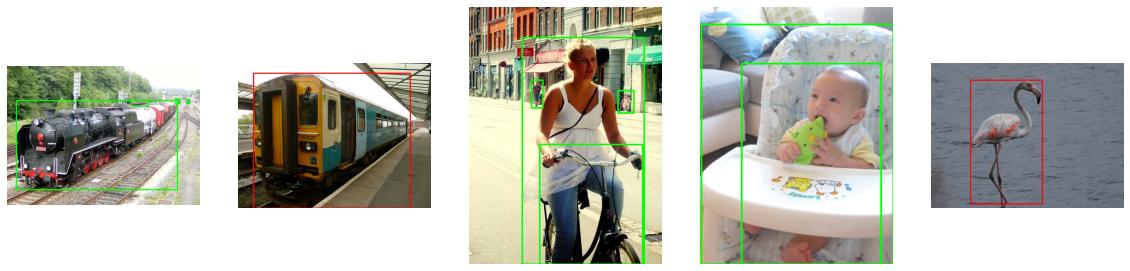

In [ ]:
plt.figure(figsize=(20,100))

selected = np.random.choice(len(data), 5)

for i, ind in enumerate(selected):
  image, annotation = data[ind]
  plt.subplot(1, 5, i+1)

  if isinstance(annotation['annotation']['object'], list):
      for obj in annotation['annotation']['object']:
        image = cv2.rectangle(np.array(image), (int(obj['bndbox']['xmin']), int(obj['bndbox']['ymin'])),
                      (int(obj['bndbox']['xmax']), int(obj['bndbox']['ymax'])), 
                      (0,255,0), 2)
  else:
      obj = annotation['annotation']['object']
      image = cv2.rectangle(np.array(image), (int(obj['bndbox']['xmin']), int(obj['bndbox']['ymin'])), 
                            (int(obj['bndbox']['xmax']), int(obj['bndbox']['ymax'])), 
                            (255,0,0), 2)

  plt.imshow(image)
  plt.axis('off')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def prepare_dataset(data):

  # get cars and motorbikes images from dataset
  def get_cars_and_motorbikes(data):
    cars_and_motobikes = []
    for image, annotation in data:
      if isinstance(annotation['annotation']['object'], list):
        for obj in annotation['annotation']['object']:
          if obj['name'] == 'car' or obj['name'] == 'motorbike':
            cars_and_motobikes.append((np.array(image), annotation))
            break
          
      else:
        obj = annotation['annotation']['object']
        if obj['name'] == 'car' or obj['name'] == 'motorbike':
            cars_and_motobikes.append((np.array(image), annotation))
      
    print(len(cars_and_motobikes))
    return cars_and_motobikes

  cars_motorbikes_dataset = get_cars_and_motorbikes(data)
  print("cars and motorbikes: ", cars_motorbikes_dataset[-1][0].shape, cars_motorbikes_dataset[-1][1])
  # print(cars_motorbikes_dataset[0][0])

  # image, obj = cars_motorbikes_dataset[-1]
  # obj = obj['annotation']['object']
  # image = cv2.rectangle(image, (int(obj['bndbox']['xmin']), int(obj['bndbox']['ymin'])), 
  #                           (int(obj['bndbox']['xmax']), int(obj['bndbox']['ymax'])), 
  #                           (0,255,0), 2)
  # plt.figure(figsize=(10,10))
  # plt.subplot(1,1,1)
  # plt.imshow(image)
  # plt.axis('off')

  # function to get bounded boxes after cropping an image
  def get_bbox_cropped(image, object, x_shift, y_shift):
    bbox = []
    # print(x_shift, y_shift)
    if isinstance(object, list):
      for obj in object:
        if obj['name'] == 'car' or obj['name'] == 'motorbike':
          bbox_xmin = max(0, int(obj['bndbox']['xmin']) - x_shift)
          bbox_ymin = max(0, int(obj['bndbox']['ymin']) - y_shift)
          bbox_xmax = min(image.shape[0], int(obj['bndbox']['xmax']) - x_shift)
          bbox_ymax = min(image.shape[1], int(obj['bndbox']['ymax']) - y_shift)

          bbox.append((obj['name'], (bbox_xmin, bbox_ymin, bbox_xmax, bbox_ymax)))
          
    else:
      obj = object
      if obj['name'] == 'car' or obj['name'] == 'motorbike':
          bbox_xmin = max(0, int(obj['bndbox']['xmin']) - x_shift)
          bbox_ymin = max(0, int(obj['bndbox']['ymin']) - y_shift)
          bbox_xmax = min(image.shape[0], int(obj['bndbox']['xmax']) - x_shift)
          bbox_ymax = min(image.shape[1], int(obj['bndbox']['ymax']) - y_shift)

          bbox.append((obj['name'], (bbox_xmin, bbox_ymin, bbox_xmax, bbox_ymax)))
    return bbox

  # Crop images
  cropped_set = []
  for image, annotation in cars_motorbikes_dataset:
    N = min(image.shape[0], image.shape[1])
    # print(image.shape)
    N = N if N % 2 != 0 else N - 1
    w_half = image.shape[0] // 2
    h_half = image.shape[1] // 2
    crop = image[w_half - N//2:w_half + N//2 + 1, h_half - N//2:h_half+N//2]

    bbox = get_bbox_cropped(crop, annotation['annotation']['object'], h_half-N//2, w_half-N//2)
    cropped_set.append((crop, bbox))
    # print('crop:', crop.shape)
  print("cropped images:", cropped_set[-1][0].shape, cropped_set[-1][1])
  # print(cropped_set[0][0])

  # function to calculate IoU
  def bb_intersection_over_union(boxA, boxB):
    if boxA[0] >= boxB[2] or boxA[1] >= boxB[3] or boxA[2] <= boxB[0] or boxA[3] <= boxB[1]:
      return 0.

    tempA = list(boxA)
    if boxA[0] < boxB[0]:
      tempA[0] = boxB[0]
    if boxA[1] < boxB[1]:
      tempA[1] = boxB[1]
    if boxA[2] > boxB[2]:
      tempA[2] = boxB[2]
    if boxA[3] > boxB[3]:
      tempA[3] = boxB[3]

    boxA = tuple(tempA)
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou


  # create regions from cropped images
  regions_dataset = []
  regions_labels = []
  for crop, bbox in cropped_set:
    crop_size = crop.shape[0] // 2
    for i in range(3):
      stride_x = i * crop.shape[0] // 4
      for j in range(3):
        stride_y = j * crop.shape[1] // 4
        region = crop[stride_x:stride_x + crop_size, stride_y: stride_y + crop_size]
        
        if len(bbox) == 1:
          area_of_intersection = bb_intersection_over_union(bbox[0][1], (stride_x, stride_y, stride_x + crop_size, stride_y + crop_size))
          item = bbox[0][0]
        else :
          areas_of_intersection = [bb_intersection_over_union(bndbox[1], (stride_x, stride_y, stride_x + crop_size, stride_y + crop_size)) for bndbox in bbox]
          item, area_of_intersection = bbox[np.argmax(np.asarray(areas_of_intersection))][0], max(areas_of_intersection)

        label = 0
        if area_of_intersection > 0.5:
          if item == 'car':
            label = 2
          if item == 'motorbike':
            label = 1
        regions_dataset.append(region)
        regions_labels.append((label, bbox))
  print("regions:", regions_dataset[-1].shape, regions_labels[-1])
  # print(regions_dataset[0])

  # resize regions to 64x64 size
  resized_regions = [resize(x, (64,64), preserve_range=True) for x in regions_dataset]
  print('resized regions:', resized_regions[-1].shape, regions_labels[-1])

  # print(resized_regions[0])

  # plt.figure(figsize=(30,30))
  # for i in range(9):
  #   plt.subplot(1,9,i+1)
  #   plt.imshow(regions_dataset[-i-1])
  #   plt.title(regions_labels[-1][0])
  #   plt.axis('off')
  # plt.figure(figsize=(10,10))
  # plt.subplot(1,1,1)
  # bndbox = cropped_set[-1][1][0][1]
  # image = cropped_set[-1][0]
  # print(image.shape)
  # image = cv2.rectangle(image, (bndbox[0], bndbox[1]), (bndbox[2], bndbox[3]), (255,0,0), 2)
  # plt.imshow(image)
  # plt.title(cropped_set[-1][1][0][0])
  # plt.axis('off')

  # split dataset into train-val-test datasets
  xtrain, x_test, ytrain, y_test = train_test_split(np.asarray(resized_regions, dtype=np.uint8), regions_labels, train_size=0.8, test_size=0.2, shuffle=False)
  # print(len(xtrain), len(ytrain))
  x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, train_size=0.75, shuffle=False)
  # print(train[0][0].shape, val[0][0].shape, test[0][0].shape)
  # print(len(x_train), len(x_val), len(x_test))
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_val), np.asarray(y_val), np.asarray(x_test), np.asarray(y_test)

x_train, y_train, x_val, y_val, x_test, y_test = prepare_dataset(data)


1656
cars and motorbikes:  (500, 334, 3) {'annotation': {'filename': '2011_003269.jpg', 'folder': 'VOC2012', 'object': {'name': 'car', 'bndbox': {'xmax': '309', 'xmin': '19', 'ymax': '461', 'ymin': '347'}, 'difficult': '0', 'occluded': '0', 'pose': 'Left', 'truncated': '0'}, 'segmented': '0', 'size': {'depth': '3', 'height': '500', 'width': '334'}, 'source': {'annotation': 'PASCAL VOC2011', 'database': 'The VOC2011 Database', 'image': 'flickr'}}}
cropped images: (333, 332, 3) [('car', (18, 263, 308, 332))]
regions: (166, 166, 3) (0, [('car', (18, 263, 308, 332))])
resized regions: (64, 64, 3) (0, [('car', (18, 263, 308, 332))])


In [ ]:
print('Shape of the training set', x_train.shape)
print('Shape of the validation set', x_val.shape)

Shape of the training set (8942, 64, 64, 3)
Shape of the validation set (2981, 64, 64, 3)


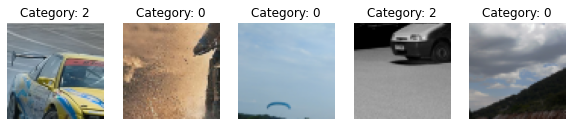

In [ ]:
plt.figure(figsize=(10,50))

selected = np.random.choice(len(x_train), 5)

for i, ind in enumerate(selected):
  image, annotation = x_train[ind], y_train[ind]
  plt.subplot(1, 5, i+1)
  plt.title("Category: %d" % (annotation[0]))
  plt.imshow(image)
  plt.axis('off')
  i += 1

Normalize datasets

In [ ]:
x_train_norm = (x_train / 127.5) - 1
x_val_norm = (x_val / 127.5) - 1
x_test_norm = (x_test / 127.5) - 1

In [ ]:
print('Scale of the samples:', (np.min(x_train_norm), np.max(x_train_norm)))

Scale of the samples: (-1.0, 1.0)


In [ ]:
from keras.utils import to_categorical
y_train_categories = to_categorical(y_train[:,0], 3)
y_val_categories = to_categorical(y_val[:,0], 3)
y_test_categories = to_categorical(y_test[:,0], 3)

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=90., width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 1 and batch size of 32.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images and labels.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False, rotation_range=90., width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True)
datagen.fit(x_train)

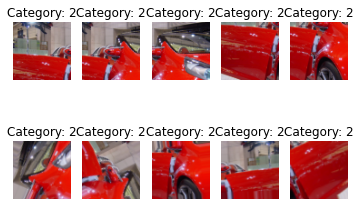

In [ ]:
data_generator = datagen.flow(x_train_norm, y=y_train_categories, batch_size=32, shuffle=True, seed=1)
x_batch, y_batch = next(datagen.flow(x_train_norm[:5], y=y_train_categories[:5], batch_size=32, shuffle=True, seed=1))

plt.figure()
# plot original images
for ind in range(5):
  plt.subplot(2, 5, ind+1)
  plt.imshow(((x_train_norm[ind]+1)*127.5).astype(np.uint8))
  plt.title("Category: %d" % np.argmax(y_train_categories[ind]))
  plt.axis('off')
# plot augmented images
for ind in range(5):
  plt.subplot(2, 5, 5+ind+1)
  plt.imshow(((x_batch[ind]+1)*127.5).astype(np.uint8))
  plt.title("Category: %d" % np.argmax(y_batch[ind]))
  plt.axis('off')

## Define the model
Define the following convolutional network:
* It has 6 conv layers with 3x3 kernes
* Filter sizes are 32, 32, 64, 64, 256, 256 (in this order)
* The 1., 3. and 5. layers are padded such that the output is the same as the input
* After every convolution comes a BatchNormalisation and ReLU activation layer
* After every second convolution comes a MaxPool layer with 2x2 pool size and a Dropout layer with rate 20%
* After the last convolutional layer add a GlobalAveragePooling2D layer and a final dense layer
* For optimizer use Adam, and add accuracy to the metrics. *Note: For multi-class classification tasks, use cross-entropy loss.*

In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [ ]:
def classnet(input_size=(64, 64, 3)):

  model = Sequential()

  model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3)))
  model.add(BatchNormalization())
  model.add(ReLU())

  model.add(Conv2D(32, (3,3)))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(ReLU())

  model.add(Conv2D(64, (3,3)))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(256, (3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(ReLU())

  model.add(Conv2D(256, (3,3)))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(GlobalAveragePooling2D())
  model.add(Dense(3))

  return model

model = classnet(input_size=(64, 64, 3))
model.summary()
model.compile(optimizer='adam', # The optimisation method
              loss=tf.keras.losses.categorical_crossentropy, # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0

## Training and evaluation 
  * Train the model for 50 epochs and use early stopping with patience of 10.
  * Plot the training curve (train/validation loss and train/validation accuracy).
  * Evaluate the trained model on the test set and plot some (5) predictions with their corresponding GT labels.
  * Print the classification report and the multilabel confusion matrix. *Note: check out the following functions: `sklearn.metrics.classification_report` and `sklearn.metrics.multilabel_confusion_matrix`*


In [ ]:
early_stopping = EarlyStopping(patience=10)
batch_size = 32
# fits the model 
history = model.fit(data_generator,
                    steps_per_epoch=len(x_train_norm) // batch_size,  
                    epochs=50,
                    validation_data=(x_val_norm, y_val_categories),
                    verbose=1, 
                    callbacks=[early_stopping])

Epoch 1/50
279/279 [==============================] - 14s 52ms/step - loss: 2.3482 - accuracy: 0.4392 - val_loss: 1.0847 - val_accuracy: 0.4978
Epoch 2/50
279/279 [==============================] - 14s 51ms/step - loss: 0.9739 - accuracy: 0.6049 - val_loss: 1.0564 - val_accuracy: 0.4982
Epoch 3/50
279/279 [==============================] - 14s 49ms/step - loss: 0.9078 - accuracy: 0.6208 - val_loss: 1.1385 - val_accuracy: 0.4982
Epoch 4/50
279/279 [==============================] - 14s 49ms/step - loss: 0.9108 - accuracy: 0.6167 - val_loss: 1.0653 - val_accuracy: 0.4982
Epoch 5/50
279/279 [==============================] - 14s 51ms/step - loss: 0.8824 - accuracy: 0.6228 - val_loss: 1.1128 - val_accuracy: 0.4237
Epoch 6/50
279/279 [==============================] - 14s 50ms/step - loss: 0.8934 - accuracy: 0.6227 - val_loss: 1.0382 - val_accuracy: 0.4421
Epoch 7/50
279/279 [==============================] - 14s 50ms/step - loss: 0.8912 - accuracy: 0.6212 - val_loss: 1.0560 - val_accuracy:

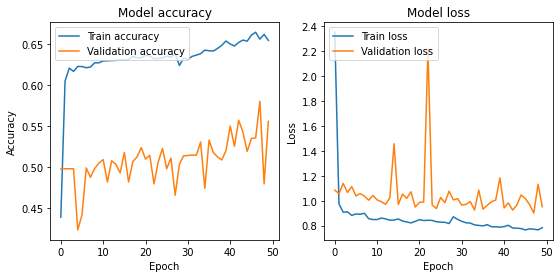

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test_norm, y_test_categories, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 0.8976520299911499
Test accuracy: 58.47%


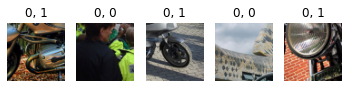

In [ ]:
pred = model.predict(x_test_norm)

# Randomly select some training examples
selected = np.random.choice(len(x_test_norm), 5)

plt.figure()
for i, ind in enumerate(selected):
  plt.subplot(1, 5, i+1)
  plt.imshow(((x_test_norm[ind]+1)*127.5).astype(np.uint8))
  plt.title("{}, {}".format(np.argmax(pred[ind]), np.argmax(y_test_categories[ind])))
  plt.axis('off')

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_norm)
print(classification_report(np.argmax(y_test_categories, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.60      0.91      0.72      1643
           1       0.79      0.05      0.09       676
           2       0.48      0.32      0.38       662

    accuracy                           0.58      2981
   macro avg       0.62      0.43      0.40      2981
weighted avg       0.62      0.58      0.51      2981



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(np.argmax(y_test_categories, axis=1), np.argmax(y_pred, axis=1)))

[[[ 339  999]
  [ 146 1497]]

 [[2296    9]
  [ 642   34]]

 [[2089  230]
  [ 450  212]]]
